In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
def display_high_number(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [3]:
def prepare_mode_data(samples):
    return [ float(f'{s:.2f}') for s in samples]

In [4]:
if not os.path.exists('images/convergence'):
    os.makedirs('images/convergence')

# Convergence study

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/ssim_comparisons_all_v2.txt', sep=";", header=None)

In [7]:
def display_high_number_50(numbers):
    n = 3
    output = []
    for number in numbers:
        output.append(','.join([str(number)[::-1][i:i+n] for i in range(0, len(str(number)), n)])[::-1])
    return output

In [15]:
def plot_scene_M(df, scene_name, regex_title, ylim, yticks):
    
    labels = [r'$G$-MoN$_b$', r'$G$-MoN', r'$GG$-MoN', r'$D$-MoN$_p$', r'$G$-MoN$_p$', r'Mean', r'MoN']
    order = [5, 6, 0, 1]

    scene_df = df[df.loc[:, 1] == scene_name]
    scene_df = scene_df[df.loc[:, 0].str.contains(regex_title)]
    
    print(scene_name, ' ', regex_title)

    params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 36,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

    plt.rcParams.update(params)


    plt.margins(tight=True)
    plt.tick_params(axis='both', width=2, length=15)

    for i in order:
        row = scene_df.iloc[i]
        plt.plot(row[2:201], label=labels[i], lw=5, alpha=0.8)
    
    #plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
    plt.xticks(np.arange(0, 220, step=40), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
    plt.yticks(yticks, prepare_mode_data(yticks))

    plt.xlabel(r'$n$')
    plt.ylabel('SSIM')

    plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.27), shadow=True, ncol=2)
    plt.ylim(ylim)
    plt.savefig(f'images/convergence/{scene_name}_{regex_title}_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
    plt.clf()
    #plt.show()

In [16]:
ylims = [(0.5, 1.0), (0.8, 1.0), (0.96, 1.0), (0.75, 1.0)]
yticks = [np.arange(0.5, 1.1, step=0.1), np.arange(0.8, 1.1, step=0.04), np.arange(0.96, 1.1, step=0.01), np.arange(0.75, 1.1, step=0.05)]
for i, scene in enumerate(['p3d_bidir', 'p3d_contemporary-bathroom', 'p3d_crown', 'p3d_villa-lights-on']):
    for m in [5, 11, 15, 21, 25]:
        plot_scene_M(df, scene, f'comparisons-M{m}', ylims[i], yticks[i])

/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


p3d_bidir   comparisons-M5


/home/jbuisine/.pyenv/versions/thesis-venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


p3d_bidir   comparisons-M11
p3d_bidir   comparisons-M15
p3d_bidir   comparisons-M21
p3d_bidir   comparisons-M25
p3d_contemporary-bathroom   comparisons-M5
p3d_contemporary-bathroom   comparisons-M11
p3d_contemporary-bathroom   comparisons-M15
p3d_contemporary-bathroom   comparisons-M21
p3d_contemporary-bathroom   comparisons-M25
p3d_crown   comparisons-M5
p3d_crown   comparisons-M11
p3d_crown   comparisons-M15
p3d_crown   comparisons-M21
p3d_crown   comparisons-M25
p3d_villa-lights-on   comparisons-M5
p3d_villa-lights-on   comparisons-M11
p3d_villa-lights-on   comparisons-M15
p3d_villa-lights-on   comparisons-M21
p3d_villa-lights-on   comparisons-M25


<Figure size 1296x720 with 0 Axes>

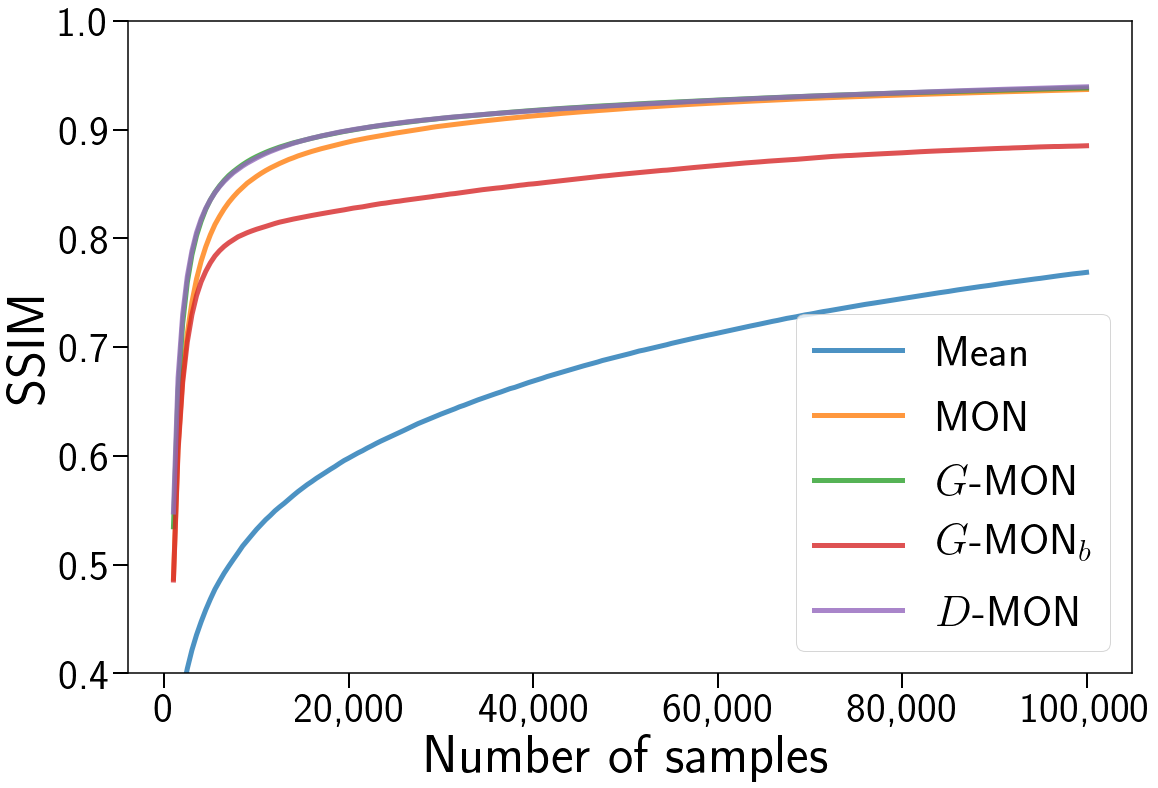

In [13]:
params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:201], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 220, step=40), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.4, 1.1, step=0.1), prepare_mode_data(np.arange(0.4, 1.1, step=0.1)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.4, 1))
plt.savefig('images/gmon_p3d_bidir_M21_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

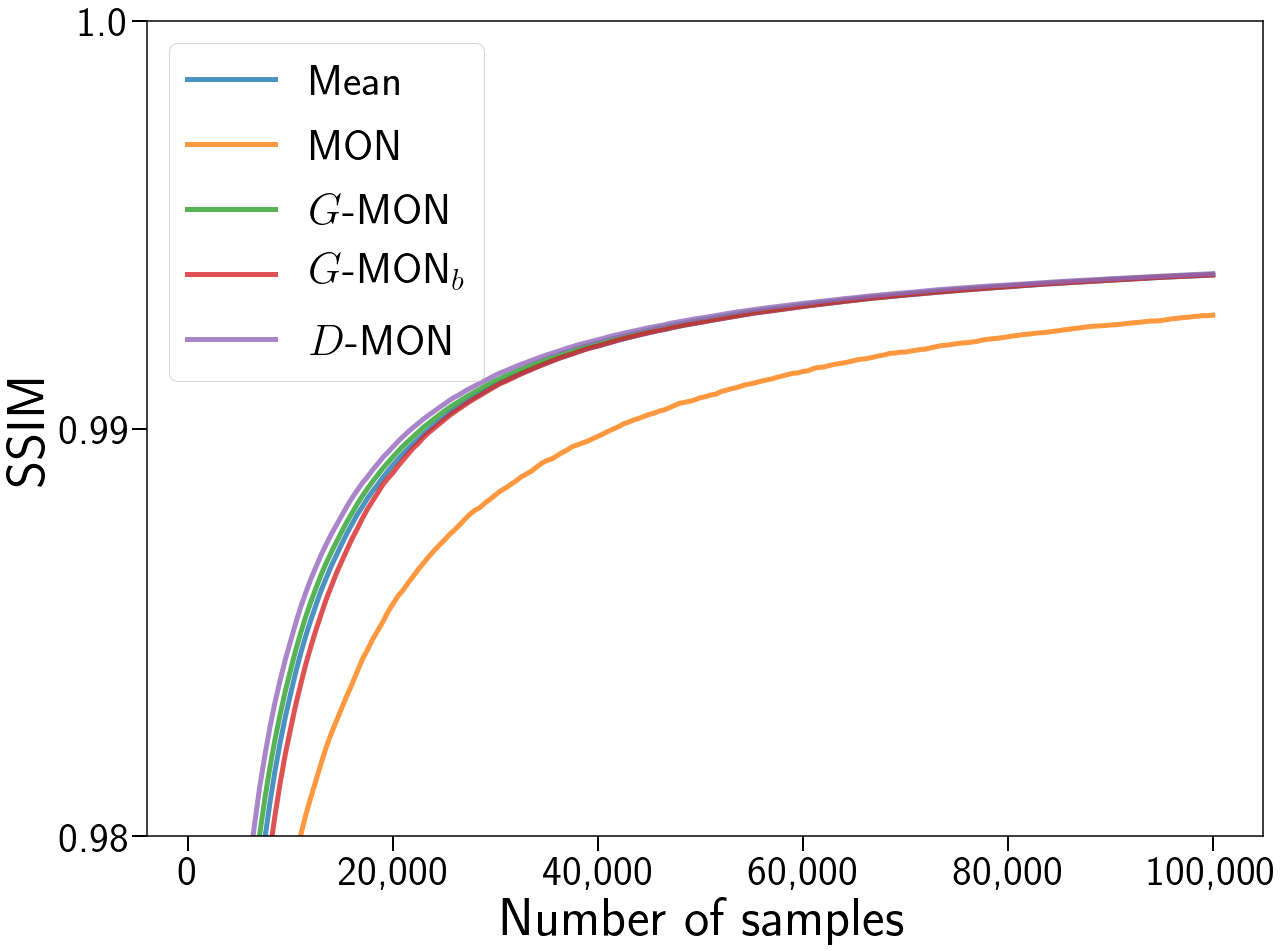

In [16]:
scene_df = df[df.loc[:, 1] == 'p3d_crown']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 8)}

plt.rcParams.update(params)

plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:201], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 220, step=40), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.98, 1.02, step=0.01), prepare_mode_data(np.arange(0.98, 1.02, step=0.01)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.98, 1))
plt.savefig('images/gmon_p3d_crown_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)

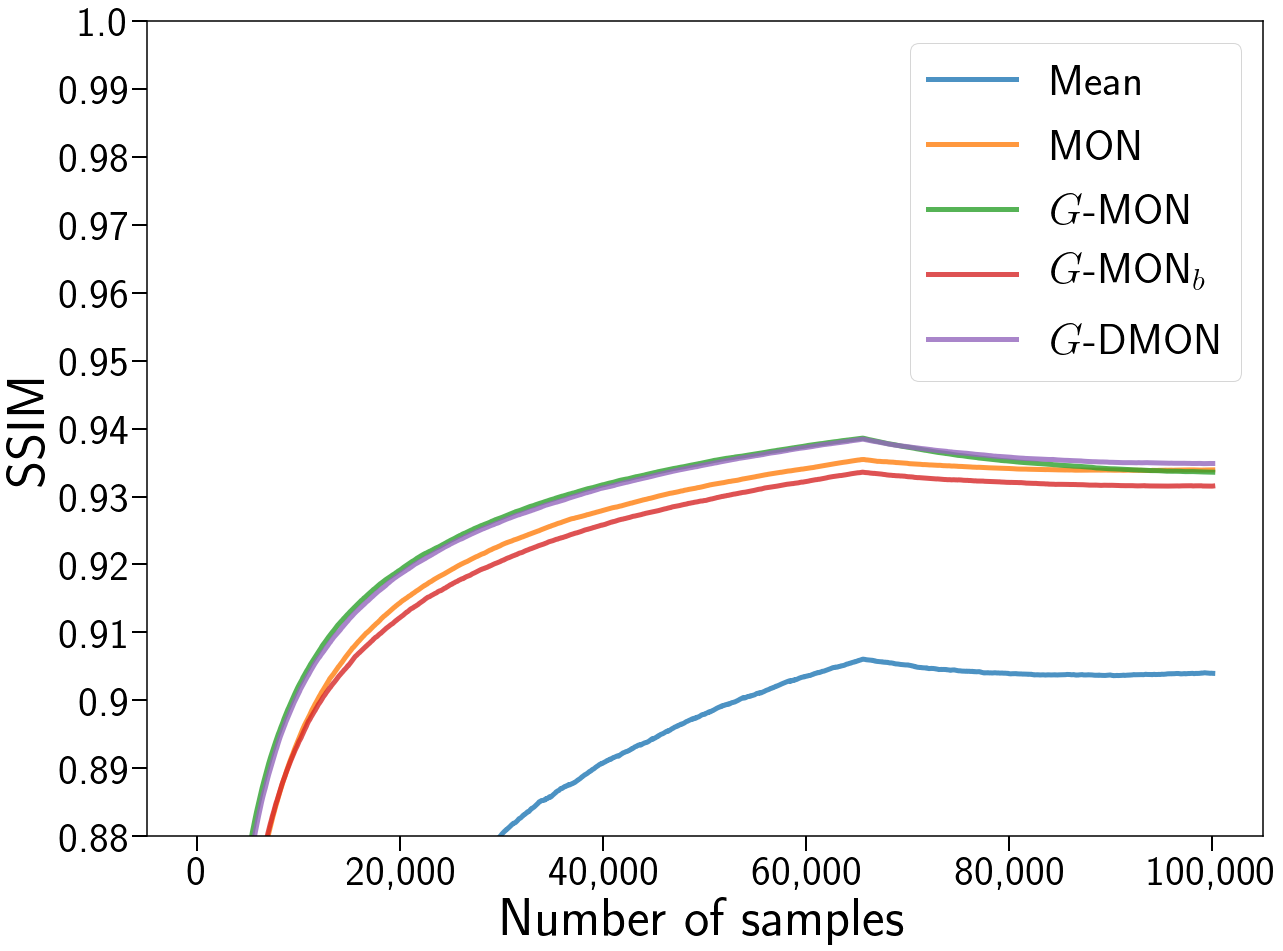

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
3,comparisons-dist-gini_mon,p3d_villa-lights-on,0.344570,0.432874,0.492811,0.538976,0.574482,0.603117,0.626742,0.646664,...,0.934856,0.934862,0.934867,0.934867,0.934867,0.934862,0.934859,0.934855,0.934860,0.934861
7,comparisons-dist-gini_partial_mon,p3d_villa-lights-on,0.344325,0.432394,0.492890,0.538472,0.574413,0.603004,0.626462,0.646135,...,0.932190,0.932174,0.932175,0.932167,0.932162,0.932158,0.932149,0.932149,0.932145,0.932149
11,comparisons-gini_binary_mon,p3d_villa-lights-on,0.331271,0.411863,0.471992,0.517431,0.552437,0.581185,0.604914,0.624724,...,0.931527,0.931532,0.931528,0.931521,0.931523,0.931523,0.931523,0.931528,0.931532,0.931540
15,comparisons-gini_mon,p3d_villa-lights-on,0.355228,0.443707,0.504168,0.549500,0.584860,0.613117,0.636695,0.656133,...,0.933585,0.933584,0.933590,0.933591,0.933594,0.933590,0.933584,0.933579,0.933578,0.933579
19,comparisons-gini_partial_mon,p3d_villa-lights-on,0.440467,0.511192,0.558529,0.593747,0.620764,0.643119,0.661013,0.676390,...,0.929863,0.929861,0.929862,0.929856,0.929858,0.929860,0.929859,0.929858,0.929869,0.929874
23,comparisons-mean,p3d_villa-lights-on,0.461345,0.511214,0.541433,0.562446,0.578650,0.591807,0.602889,0.612121,...,0.904015,0.904005,0.904000,0.903977,0.903983,0.903994,0.904002,0.903989,0.903983,0.903979
27,comparisons-mon,p3d_villa-lights-on,0.329238,0.410168,0.470381,0.515787,0.551144,0.580052,0.603980,0.623921,...,0.933903,0.933907,0.933905,0.933904,0.933906,0.933916,0.933919,0.933924,0.933922,0.933923


In [73]:
scene_df = df[df.loc[:, 1] == 'p3d_villa-lights-on']

params = {'backend': 'ps',
          'axes.labelsize': 54,
          'font.size': 40,
          'legend.fontsize': 44,
          'xtick.labelsize': 42,
          'ytick.labelsize': 42,
          'text.usetex': True,
          'font.style': 'normal',
          'font.weight': 'bold',
          'axes.linewidth': 1.5,
          'lines.linewidth': 4,
          'figure.figsize': (18, 10)}

plt.rcParams.update(params)


plt.margins(tight=True)
plt.tick_params(axis='both', width=2, length=15)

for i in order:
    row = scene_df.iloc[i]
    plt.plot(row[2:2002], label=labels[i], lw=5, alpha=0.8)

#plt.xticks(np.arange(0, 1200, step=200), display_high_number(np.arange(0, 60000, step=10000)))  # Set label locations.
plt.xticks(np.arange(0, 2200, step=400), display_high_number(np.arange(0, 110000, step=20000)))  # Set label locations.
plt.yticks(np.arange(0.85, 1.01, step=0.02), prepare_mode_data(np.arange(0.85, 1.01, step=0.02)))

plt.xlabel('Number of samples')
plt.ylabel('SSIM')

plt.legend()
plt.ylim((0.88, 1))
plt.savefig('images/gmon_p3d_villa_100000.png', transparent=False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()
scene_df